# Multi-class classification using pytorch

## import library

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import random
import os

## load data

In [2]:
directory_data  = './'
filename_data   = 'assignment_06_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

In [3]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 32, 32)
size of y_train : (20000,)
*************************************************
size of x_test : (8000, 32, 32)
size of y_test : (8000,)
*************************************************
number of training image : 20000
height of training image : 32
width of training image : 32
*************************************************
number of testing image : 8000
height of testing image : 32
width of testing image : 32
*************************************************


## number of classes

In [4]:
print('*************************************************')
print('number of classes :', len(set(y_train)))
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## custom data loader for the PyTorch framework

In [5]:
class dataset(Dataset):
    
    def __init__(self, image, label):
        
        self.image  = image
        self.label  = label.astype(int)
    
    def __getitem__(self, index):
        
        image   = self.image[index, :, :]
        label   = self.label[index, ]

        image   = torch.FloatTensor(image).unsqueeze(dim=0)
        label   = torch.LongTensor([label])

        return image, label
    
    def __len__(self):
        
        return self.image.shape[0]

    def collate_fn(self, batch):
        images  = list()
        labels  = list()

        for b in batch:
            images.append(b[0])
            labels.append(b[1])

        images  = torch.stack(images, dim=0)
        labels  = torch.stack(labels, dim=0).squeeze()

        return images, labels

## setting device (cpu or gpu)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 
                      'mps' if torch.backends.mps.is_built() and torch.backends.mps.is_available() else
                      'cpu')

In [7]:
print(device)

cuda


## construct datasets and dataloaders for training and testing

In [93]:
# ================================================== 
# determine the value of the following parameter
#
size_minibatch      = 32
#
# ================================================== 

dataset_train       = dataset(x_train, y_train)
dataset_test        = dataset(x_test, y_test)

dataloader_train    = torch.utils.data.DataLoader(dataset_train, batch_size=size_minibatch, shuffle=True, drop_last=True, collate_fn=dataset_train.collate_fn)
dataloader_test     = torch.utils.data.DataLoader(dataset_test, batch_size=size_minibatch, shuffle=True, drop_last=True, collate_fn=dataset_test.collate_fn)

## shape of the data when using the data loader

In [94]:
image, label    = next(iter(dataloader_train))

In [95]:
print('************************************************************')
print('size of mini-batch of the image:', image.shape)
print('************************************************************')
print('size of mini-batch of the label:', label.shape)
print('************************************************************')

************************************************************
size of mini-batch of the image: torch.Size([32, 1, 32, 32])
************************************************************
size of mini-batch of the label: torch.Size([32])
************************************************************


## construct a neural network 

In [107]:
# ================================================== 
# define the neural network architecture
#
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        self.feature    = nn.Sequential(
            # 97.40
#             nn.Conv2d(in_channels=1, out_channels=2, kernel_size=2, stride=1, padding=1, bias=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.ReLU(),

#             nn.Conv2d(in_channels=2, out_channels=4, kernel_size=2, stride=1, padding=1, bias=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.ReLU(),

#             nn.Conv2d(in_channels=4, out_channels=8, kernel_size=2, stride=1, padding=1, bias=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.ReLU(),
            # x
#             nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1, bias=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.ReLU(),

#             nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.ReLU(),
            
            # 98.55
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            
        )

        self.classifier = nn.Sequential(
            # 97.40
#             nn.Linear(128, 64, bias=True),
#             nn.ReLU(),
#             nn.Linear(64, 10, bias=True),
            
            # 98.55
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

        self.network    = nn.Sequential(
            self.feature,
            nn.Flatten(),
            self.classifier,
        )

        self.initialize()


    def initialize(self):

        for m in self.network.modules():

            if isinstance(m, nn.Conv2d):

                #nn.init.constant_(m.weight, 0.01)
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 1)

            elif isinstance(m, nn.Linear):
    
                #nn.init.constant_(m.weight, 0.01)
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 1)


    def forward(self, input):

        output = self.network(input)

        return output
#
# ================================================== 

## build network

In [108]:
del classifier

NameError: name 'classifier' is not defined

In [109]:
# ================================================== 
# determine the value of the following parameter
#
learning_rate   = 0.01
weight_decay    = 0.0001
#
# ================================================== 

classifier      = Classifier().to(device)
optimizer       = torch.optim.SGD(classifier.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [110]:
print(classifier)

Classifier(
  (feature): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
  (network): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

## compute the prediction

In [45]:
def compute_prediction(model, input):

# ================================================== 
# fill up the blank
# 
    prediction = model(input)
#
# ================================================== 

    return prediction

## compute the loss
- use `CrossEntropyLoss`
- compute loss and its value (`loss.item()`)

In [46]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#    

    loss_fn     = nn.CrossEntropyLoss()
    loss        = loss_fn(prediction, label)

#
# ================================================== 

    return loss

## compute the loss value

In [47]:
def compute_loss_value(loss):
    
    loss_value = loss.item()
    
    return loss_value

## compute the accuracy
- accuracy in percentile : 0 - 100 (%)

In [66]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#

    accuracy = torch.argmax(prediction, dim=1) == label
    accuracy = accuracy.to(torch.float).mean().item()
    accuracy = accuracy * 100

#
# ================================================== 

    return accuracy

## variables for the learning curve

In [111]:
# ================================================== 
# determine the value of the following parameter
#
number_epoch        = 100
#
# ================================================== 

loss_train_mean     = np.zeros(number_epoch)
loss_train_std      = np.zeros(number_epoch)
accuracy_train_mean = np.zeros(number_epoch)
accuracy_train_std  = np.zeros(number_epoch)

loss_test_mean      = np.zeros(number_epoch)
loss_test_std       = np.zeros(number_epoch)
accuracy_test_mean  = np.zeros(number_epoch)
accuracy_test_std   = np.zeros(number_epoch)

## train and test

In [133]:
number_epoch = 10

In [206]:
# ================================================================================
# 
# iterations for epochs
#
# ================================================================================
for i in tqdm(range(number_epoch)):
    
    # ================================================================================
    # 
    # training
    #
    # ================================================================================
    loss_train_epoch        = []
    accuracy_train_epoch    = []

    classifier.train()

    for index_batch, (image_train, label_train) in enumerate(dataloader_train):

        image_train = image_train.to(device)
        label_train = label_train.to(device)

# ================================================== 
# fill up the blank
#       
  
        prediction_train        = compute_prediction(classifier, image_train)
        loss_train              = compute_loss(prediction_train, label_train)
        loss_value_train        = compute_loss_value(loss_train)
        accuracy_train          = compute_accuracy(prediction_train, label_train)
        
#
# ================================================== 

        loss_train_epoch.append(loss_value_train)
        accuracy_train_epoch.append(accuracy_train)

# ================================================== 
# fill up the blank (update model parameters using a mini-batch)
#       
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
#
# ==================================================  


#     loss_train_mean[i]      = np.mean(loss_train_epoch)
#     loss_train_std[i]       = np.std(loss_train_epoch)

#     accuracy_train_mean[i]  = np.mean(accuracy_train_epoch)
#     accuracy_train_std[i]   = np.std(accuracy_train_epoch)

    # for continuous learning
    loss_train_mean = np.append(loss_train_mean, np.mean(loss_train_epoch))
    loss_train_std = np.append(loss_train_std, np.mean(loss_train_epoch))
    accuracy_train_mean = np.append(accuracy_train_mean, np.mean(accuracy_train_epoch))
    accuracy_train_std = np.append(accuracy_train_std, np.std(accuracy_train_epoch))

    # ================================================================================
    # 
    # testing
    #
    # ================================================================================
    loss_test_epoch        = []
    accuracy_test_epoch    = []

    classifier.eval()

    for index_batch, (image_test, label_test) in enumerate(dataloader_test):

        image_test = image_test.to(device)
        label_test = label_test.to(device)

# ================================================== 
# fill up the blank
#         
 
        prediction_test = compute_prediction(classifier, image_test)
        loss_test       = compute_loss(prediction_test, label_test)
        loss_value_test = compute_loss_value(loss_test)
        accuracy_test   = compute_accuracy(prediction_test, label_test)
        
#
# ================================================== 

        loss_test_epoch.append(loss_value_test)
        accuracy_test_epoch.append(accuracy_test)

#     loss_test_mean[i]      = np.mean(loss_test_epoch)
#     loss_test_std[i]       = np.std(loss_test_epoch)

#     accuracy_test_mean[i]  = np.mean(accuracy_test_epoch)
#     accuracy_test_std[i]   = np.std(accuracy_test_epoch)

    # for continuous learning
    loss_test_mean = np.append(loss_test_mean, np.mean(loss_test_epoch))
    loss_test_std = np.append(loss_test_std, np.std(loss_test_epoch))
    accuracy_test_mean = np.append(accuracy_test_mean, np.mean(accuracy_test_epoch))
    accuracy_test_std = np.append(accuracy_test_std, np.std(accuracy_test_epoch))

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


---

## functions for presenting the results

---

In [24]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [25]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [26]:
def function_result_03():

    title           = 'accuracy (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train_mean)), accuracy_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(accuracy_train_mean)), accuracy_train_mean - accuracy_train_std, accuracy_train_mean + accuracy_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [27]:
def function_result_04():

    title           = 'accuracy (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test_mean)), accuracy_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(accuracy_test_mean)), accuracy_test_mean - accuracy_test_std, accuracy_test_mean + accuracy_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [28]:
def function_result_05():

    print('final training accuracy = %9.8f' % (accuracy_train_mean[-1]))

In [29]:
def function_result_06():

    print('final testing accuracy = %9.8f' % (accuracy_test_mean[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



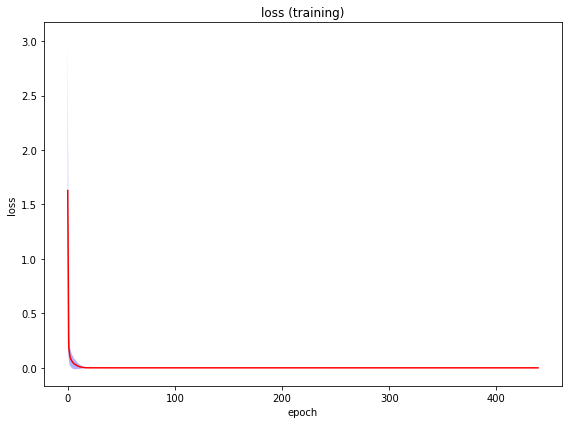


################################################################################
#
# RESULT # 02
#
################################################################################



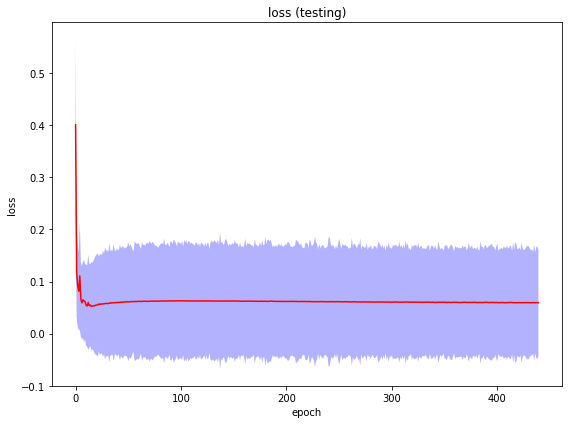


################################################################################
#
# RESULT # 03
#
################################################################################



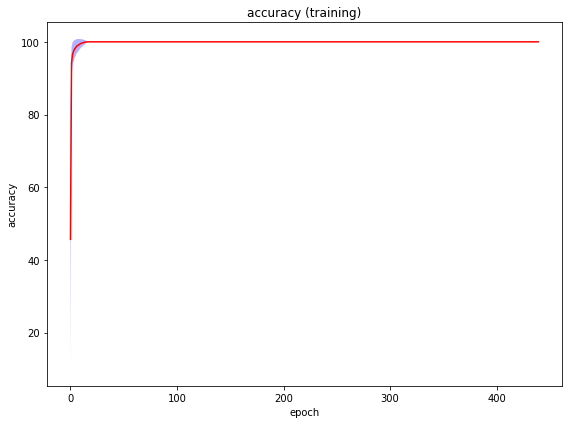


################################################################################
#
# RESULT # 04
#
################################################################################



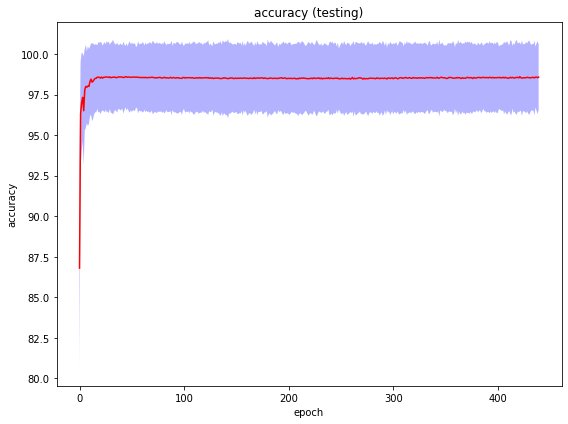


################################################################################
#
# RESULT # 05
#
################################################################################

final training accuracy = 100.00000000

################################################################################
#
# RESULT # 06
#
################################################################################

final testing accuracy = 98.57499695


In [207]:
number_result = 6 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)

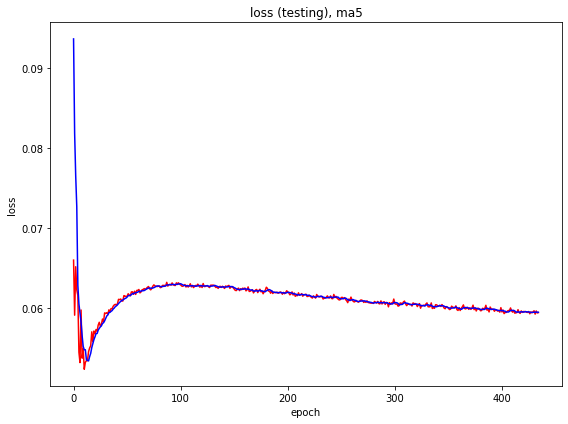

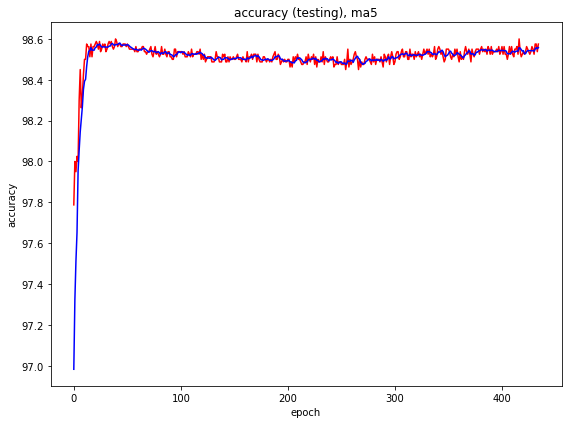

In [208]:
def lossplot():
    title           = 'loss (testing), ma5'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean[5:])), loss_test_mean[5:], '-', color = color_mean)
    plt.plot(range(len(loss_test_mean[5:])), np.mean(np.array([loss_test_mean[5:]]+[loss_test_mean[4-f:-1-f] for f in range(4)]), axis=0), '-', color='blue')
    # plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 

    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

def accplot():
    title           = 'accuracy (testing), ma5'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test_mean[5:])), accuracy_test_mean[5:], '-', color = color_mean)
    plt.plot(range(len(accuracy_test_mean[5:])), np.mean(np.array([accuracy_test_mean[5:]]+[accuracy_test_mean[4-f:-1-f] for f in range(4)]), axis=0), '-', color='blue')
#     plt.fill_between(range(len(accuracy_test_mean)), accuracy_test_mean - accuracy_test_std, accuracy_test_mean + accuracy_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

lossplot()
accplot()